<a href="https://colab.research.google.com/github/khagendra1998/A-rule-based-expert-system-to-identify-the-type-of-cybercrime/blob/master/NetBIOS_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NetBIOS DATASET**

**Load the data from the google drive**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the Data from CSV file

data = pd.read_csv("/content/drive/My Drive/Datasets/NetBIOS.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Show the First Five rows of the Dataset**

In [2]:
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,302291,172.16.0.5-192.168.50.4-648-16174-17,172.16.0.5,648,192.168.50.4,16174,17,2018-11-03 10:01:48.920574,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,341625,172.16.0.5-192.168.50.4-861-34200-17,172.16.0.5,861,192.168.50.4,34200,17,2018-11-03 10:01:48.920625,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,245313,172.16.0.5-192.168.50.4-862-4750-17,172.16.0.5,862,192.168.50.4,4750,17,2018-11-03 10:01:48.920685,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,266106,172.16.0.5-192.168.50.4-863-4443-17,172.16.0.5,863,192.168.50.4,4443,17,2018-11-03 10:01:48.921008,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,47182,172.16.0.5-192.168.50.4-864-48627-17,172.16.0.5,864,192.168.50.4,48627,17,2018-11-03 10:01:48.921010,48,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,9.541667e+06,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


**Description of the dataset**

In [3]:
data.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3455893.0,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3455899.0,3455899.0,3455899.0,3.455899e+06,3.455899e+06,3.455899e+06,...,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3455899.0,3.455899e+06,3.455899e+06,3455899.0,3.455899e+06,3.455899e+06,3.455899e+06,3455899.0,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3455899.0,3455899.0,3455899.0,3455899.0,3455899.0,3455899.0,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06,3.455899e+06
mean,1.728110e+05,7.763060e+02,3.280407e+04,1.699579e+01,4.801868e+04,2.008762e+00,4.209614e-03,4.593605e+02,2.428768e+00,2.288984e+02,2.287999e+02,2.288244e+02,3.623629e-02,1.750309e-01,8.582137e-03,5.308399e-02,5.113500e-02,inf,inf,1.552742e+04,2.694020e+04,4.710237e+04,1.396336e+01,4.793223e+04,1.558573e+04,2.697590e+04,4.704504e+04,1.381382e+01,1.212433e+03,1.314965e+02,2.106203e+02,5.604714e+02,1.108250e-03,8.825489e-05,0.0,0.0,0.0,-4.999604e+07,1.150769e-01,1.456024e+06,...,2.290023e+02,2.288400e+02,5.804092e-02,3.187824e+01,0.0,4.919125e-06,8.825489e-05,0.0,1.617524e-04,2.045777e-04,6.655287e-05,0.0,3.877428e-04,3.431292e+02,2.288244e+02,5.308399e-02,-4.999604e+07,0.0,0.0,0.0,0.0,0.0,0.0,2.008762e+00,4.593605e+02,4.209614e-03,2.428768e+00,3.761101e+00,1.821355e-01,1.007300e+00,-2.484474e+07,4.830855e+01,1.344811e+01,6.119667e+01,3.949511e+01,4.693703e+04,5.502280e+01,4.698562e+04,4.689622e+04,9.995396e-01
std,9.979139e+04,1.129055e+03,1.891803e+04,2.177521e-01,1.402572e+06,6.220993e-01,7.225205e-01,1.165926e+02,8.062723e+02,1.555883e+01,1.219080e+01,1.210353e+01,3.941777e+00,2.025218e+01,8.964653e-01,5.925404e+00,6.050070e+00,NaN,NaN,4.619285e+05,8.002907e+05,1.389049e+06,3.217692e+03,1.402276e+06,4.623066e+05,8.005257e+05,1.388915e+06,3.216865e+03,1.801643e+05,2.164209e+04,3.089930e+04,7.934444e+04,1.967676e-01,9.393994e-03,0.0,0.0,0.0,3.983337e+08,2.110137e+01,8.353130e+05,...,2.288899e+01,1.214394e+01,5.645785e+00,4.188926e+03,0.0,2.217905e-03,9.393994e-03,0.0,1.271717e-02,1.430161e-02,8.157724e-03,0.0,2.598493e-02,1.824980e+01,1.210353e+01,5.925404e+00,3.983337e+08,0.0,0.0,0.0,0.0,0.0,0.0,6.220993e-01,1.165926e+02,7.225205e-01,8.0627

**Make the List of the Relevant Columns of Dataset**

It can be analysis by the CICFlowMeter
this the URL of the CICFlowMeter

http://netflowmeter.ca/

In [0]:
irr = [' Fwd Packet Length Max',
    ' Fwd Packet Length Min',
    ' Min Packet Length',
    ' Max Packet Length',
    ' Average Packet Size',
    'Fwd Packets/s',
    ' Fwd Header Length',
    ' Fwd Header Length.1',
    ' min_seg_size_forward',
    'Total Length of Fwd Packets',
    ' Fwd Packet Length Std',
    ' Flow IAT Min',
    ' Subflow Fwd Bytes',
    ' Destination Port',
    ' Protocol',
    ' Packet Length Std',
    ' Flow Duration',
    'Fwd IAT Total',
    ' ACK Flag Count',
    'Init_Win_bytes_forward',
    ' Flow IAT Mean',
    ' Flow IAT Max',
    ' Fwd IAT Mean',
    ' Fwd IAT Max']

In [5]:
print(len(irr))

24


**Here we remove the Irrevelent Columns except Revelent Column List which is defined above**

In [0]:
remove_col = []
for mycol in data.columns:
    if all (x not in mycol for x in irr):
        remove_col.append(mycol)

In [7]:
print(remove_col)
print(len(remove_col))

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Timestamp', ' Total Fwd Packets', ' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Std', ' Fwd IAT Std', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Bwd Header Length', ' Bwd Packets/s', ' Packet Length Mean', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Bwd Packets', ' Subflow Bwd

In [8]:
data = data.drop(['Unnamed: 0',
'Flow ID',
' Source IP',
' Source Port',
' Destination IP',
' Timestamp',
' Total Fwd Packets',
' Total Backward Packets',
' Total Length of Bwd Packets',
' Fwd Packet Length Mean',
'Bwd Packet Length Max',
' Bwd Packet Length Min',
' Bwd Packet Length Mean',
'Flow Bytes/s',
' Flow Packets/s',
' Flow IAT Std',
' Fwd IAT Std',
' Fwd IAT Min',
'Bwd IAT Total',
' Bwd IAT Mean',
' Bwd IAT Std',
' Bwd IAT Max',
' Bwd IAT Min',
'Fwd PSH Flags',
' Bwd PSH Flags',
' Fwd URG Flags',
' Bwd URG Flags',
' Bwd Header Length',
' Bwd Packets/s',
' Packet Length Mean',
' Packet Length Variance',
'FIN Flag Count',
' SYN Flag Count',
' RST Flag Count',
' PSH Flag Count',
' URG Flag Count',
' CWE Flag Count',
' ECE Flag Count',
' Down/Up Ratio',
' Avg Fwd Segment Size',
' Avg Bwd Segment Size',
'Fwd Avg Bytes/Bulk',
' Fwd Avg Packets/Bulk',
' Fwd Avg Bulk Rate',
' Bwd Avg Bytes/Bulk',
' Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate',
'Subflow Fwd Packets',
' Subflow Bwd Packets',
' Subflow Bwd Bytes',
' Init_Win_bytes_backward',
' act_data_pkt_fwd',
'Active Mean',
' Active Std',
' Active Max',
' Active Min',
'Idle Mean',
' Idle Std',
' Idle Max',
' Idle Min',
'SimillarHTTP',
' Inbound'],axis=1)
data.head()

,Destination Port,Protocol,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Std,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Max,Fwd Header Length,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Std,ACK Flag Count,Average Packet Size,Fwd Header Length.1,Subflow Fwd Bytes,Init_Win_bytes_forward,min_seg_size_forward,Label
0,16174,17,1,458.0,229.0,229.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-2,2.000000e+06,229.0,229.0,0.0,0,343.5,-2,458,-1,-1,NetBIOS
1,34200,17,1,458.0,229.0,229.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-2,2.000000e+06,229.0,229.0,0.0,0,343.5,-2,458,-1,-1,NetBIOS
2,4750,17,1,458.0,229.0,229.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-2,2.000000e+06,229.0,229.0,0.0,0,343.5,-2,458,-1,-1,NetBIOS
3,4443,17,1,458.0,229.0,229.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-2,2.000000e+06,229.0,229.0,0.0,0,343.5,-2,458,-1,-1,NetBIOS
4,48627,17,48,458.0,229.0,229.0,0.0,0.0,48.0,48.0,48.0,48.0,48.0,48.0,-2,4.166667e+04,229.0,229.0,0.0,0,343.5,-2,458,-1,-1,NetBIOS


**Shape of the Clean Dataset**

In [9]:
data.shape

(3455899, 26)

**Check any Column have empty space**

In [10]:
data.isnull().sum()

 Destination Port              0
 Protocol                      0
 Flow Duration                 0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Std         0
 Bwd Packet Length Std         0
 Flow IAT Mean                 0
 Flow IAT Max                  0
 Flow IAT Min                  0
Fwd IAT Total                  0
 Fwd IAT Mean                  0
 Fwd IAT Max                   0
 Fwd Header Length             0
Fwd Packets/s                  0
 Min Packet Length             0
 Max Packet Length             0
 Packet Length Std             0
 ACK Flag Count                0
 Average Packet Size           0
 Fwd Header Length.1           0
 Subflow Fwd Bytes             0
Init_Win_bytes_forward         0
 min_seg_size_forward          0
 Label                         0
dtype: int64

**Here no column have the empty space of NULL values all columns are the full**

**This we check the Object datatype column in the dataset**

In [11]:
for i in data.columns:
    if(data[i].dtype == np.object):
        print(i)

 Label


**Divide the data into two parts in X and Y**

In [12]:
y = data[' Label']
x = data.drop([' Label'],axis=1)

print("\n<<====================== X ================================>>\n",x)
print("\n<<====================== Y ================================>>\n",y)


<<====================== X ================================>>
           Destination Port  ...   min_seg_size_forward
0                    16174  ...                     -1
1                    34200  ...                     -1
2                     4750  ...                     -1
3                     4443  ...                     -1
4                    48627  ...                     -1
...                    ...  ...                    ...
3455894              13711  ...                      0
3455895              65260  ...                      0
3455896              48342  ...                      0
3455897              64931  ...                      0
3455898              38749  ...                      0

[3455899 rows x 25 columns]

<<====================== Y ================================>>
 0          NetBIOS
1          NetBIOS
2          NetBIOS
3          NetBIOS
4          NetBIOS
            ...   
3455894    NetBIOS
3455895    NetBIOS
3455896    NetBIOS
3455897    N

**Split the dataset into the x_train, x_test, y_train, y_test**

**Split Ratio into Test and train is 30:70 means that 30% of the total data is goes for the test and 70% of the total data is goes for the training.**

In [13]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.30,
                                               random_state=42)
print("\n<<======== X_Train ========>>\n",x_train.shape)
print("\n<<======== X_Train ========>>\n",y_train.shape)
print("\n<<======== X_Test ========>>\n",x_test.shape)
print("\n<<======== Y_Test ========>>\n",y_test.shape)


<<======== X_Train ========>>
 (2419129, 25)

<<======== X_Train ========>>
 (2419129,)

<<======== X_Test ========>>
 (1036770, 25)

<<======== Y_Test ========>>
 (1036770,)


#**LOGISTIC REGRESSION**

**Fiting the model in the Logistic Regression Algorithm**

In [14]:
#fitting the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#predicting the test result
y_pred = classifier.predict(x_test)
print(y_pred)

['NetBIOS' 'NetBIOS' 'NetBIOS' ... 'NetBIOS' 'NetBIOS' 'NetBIOS']


**Confusion Matrix of the Logisitic Regression**

In [16]:
#checking the accuracy of model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print("\n<<================= Confusion Matrix ======================>> \n",cfm)


<<================= Confusion Matrix ======================>> 
 [[    139     220]
 [     21 1036390]]


**Classification Report of the Logistic Regeression**

In [17]:
## Classification Report

print("\n<<==================== Calssification Report ====================>>\n")

print (classification_report(y_test, y_pred))


<<==================== Calssification Report ====================>>

              precision    recall  f1-score   support

      BENIGN       0.87      0.39      0.54       359
     NetBIOS       1.00      1.00      1.00   1036411

    accuracy                           1.00   1036770
   macro avg       0.93      0.69      0.77   1036770
weighted avg       1.00      1.00      1.00   1036770



**Accuracy of the Logistic Regression**

In [18]:
## Accuracy Of The Model In the Linear Regression Algo
acc = accuracy_score(y_test, y_pred)
print ('\n<<================================ Accuracy Of the Model in LR Algo ================================>>\n', acc*100)


<<================================ Accuracy Of the Model in LR Algo ================================>>
 99.97675472862834


In [19]:
############ 
from sklearn.metrics import accuracy_score
print("Model Accuracy is : \n ",accuracy_score(y_test,y_pred))

Model Accuracy is : 
  0.9997675472862834


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred))
print("\n\n <<===================================>> \n\n")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

      BENIGN       0.87      0.39      0.54       359
     NetBIOS       1.00      1.00      1.00   1036411

    accuracy                           1.00   1036770
   macro avg       0.93      0.69      0.77   1036770
weighted avg       1.00      1.00      1.00   1036770



 <<===================================>> 


[[    139     220]
 [     21 1036390]]


#**NAIVE BAYES ALGORITHM**

**Fiting the Model into the Navie Bayes Algorithm**

In [21]:
############ now we solve naive Bayes algo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
## model fit on x,y data
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
#predicting the test result
y_pred = classifier.predict(x_test)
print(y_pred)

['NetBIOS' 'NetBIOS' 'NetBIOS' ... 'NetBIOS' 'NetBIOS' 'NetBIOS']


**Confusion Matrix of the Naive Bayes Algorithm**

In [23]:
#checking the accuracy of model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test, y_pred)
print("\n<<================= Confusion Matrix ======================>> \n",cfm)


<<================= Confusion Matrix ======================>> 
 [[     67     292]
 [   1158 1035253]]


**Classification Report of the Naive Bayes Algorithm**

In [24]:
## Classification Report

print("\n<<==================== Calssification Report ====================>>\n")

print (classification_report(y_test, y_pred))


<<==================== Calssification Report ====================>>

              precision    recall  f1-score   support

      BENIGN       0.05      0.19      0.08       359
     NetBIOS       1.00      1.00      1.00   1036411

    accuracy                           1.00   1036770
   macro avg       0.53      0.59      0.54   1036770
weighted avg       1.00      1.00      1.00   1036770



**Accuracy of the Naive Bayes Algorithm**

In [25]:
## Accuracy Of The Model In the Linear Regression Algo
acc = accuracy_score(y_test, y_pred)
print ('\n<<================================ Accuracy Of the Model in LR Algo ================================>>\n', acc*100)


<<================================ Accuracy Of the Model in LR Algo ================================>>
 99.86014255813728


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,y_pred))
print("\n\n <<===================================>> \n\n")
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

      BENIGN       0.05      0.19      0.08       359
     NetBIOS       1.00      1.00      1.00   1036411

    accuracy                           1.00   1036770
   macro avg       0.53      0.59      0.54   1036770
weighted avg       1.00      1.00      1.00   1036770



 <<===================================>> 


[[     67     292]
 [   1158 1035253]]


#**KNN ALGORITHM**

**Label Encoding of the Label Column in the Dataset becasuse its dtype is Object**

In [0]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.fit_transform(y_test)

**Fiting the Model in the KNN Algorithm**

In [28]:
from sklearn.neighbors import  KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)

model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [29]:
THRESHOLD = 0.67

import numpy as np

y_pred = np.where(model.predict_proba(x_test)[:,1] > THRESHOLD, 1,0)

#Print(model.predict_proba(x_test))
#model test and take y_pred value

print(y_pred)

[1 1 1 ... 1 1 1]


**Accuracy and Classification Report of the KNN Algorithn**

In [30]:
##################

from sklearn.metrics import accuracy_score
print("Model Accuracy is : \n ", accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("\n\n <<===================================>> \n\n")
print("\t CLASSIFICATION REPORT \n")
print(classification_report(y_test,y_pred))
print("\n\n <<===================================>> \n\n")
print("Confusion Matrix \n ")
print(confusion_matrix(y_test,y_pred))

Model Accuracy is : 
  0.9998504972173192


 <<===================================>> 


	 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       359
           1       1.00      1.00      1.00   1036411

    accuracy                           1.00   1036770
   macro avg       0.88      0.91      0.90   1036770
weighted avg       1.00      1.00      1.00   1036770



 <<===================================>> 


Confusion Matrix 
 
[[    298      61]
 [     94 1036317]]


**Comparision of the Accuracies of the**

**1.   Logistic Regression**

**2.   KNN Algorithm**

**3.   Naive Bayes Algorithm**


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


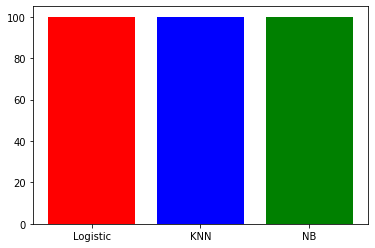

In [31]:
accu_LR =  0.9997675472862834*100
accu_KNN =  0.9998504972173192 *100
accu_NB = 99.86014255813728

import matplotlib.pyplot as plt
import matplotlib as pl
import seaborn as sns
y=[accu_LR,accu_KNN,accu_NB]
x=["Logistic","KNN","NB"]
c=["red","blue","green"]
plt.bar(x,y,color=c)
plt.show()